### **Fake Bill Detection**

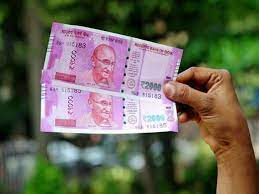

In this notebook we are going to predict if a bank note is true or false based on different measurements. There are five measurements:

1)length, the length of the banknote in mm

2)height left, the height of the left side of the banknote in mm

3)height right, the height of the right side of the bank note in mm


4)diagonal, the diagonal of the bank note in mm

5)margin low, lower side margin in mm

6)margin up, upper side margin in mm

7)The last column is_genuine is the target





Imports

In [1]:
!pip install -q autoviz
!pip install -q -U --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 110.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 9.8 MB/s eta 0:0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from autoviz.classify_method import data_cleaning_suggestions,data_suggestions
from pycaret.classification import *
from sklearn.model_selection import cross_val_score

Data Loading

In [6]:
df=pd.read_csv("fake_bills.csv",sep=';')

In [7]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [8]:
df.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [9]:
df.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25
1499,False,171.47,104.15,103.82,4.63,3.37,112.07


In [10]:
df.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [11]:
df.fillna(df.mean,inplace=True)

In [12]:
df.isna().any()

is_genuine      False
diagonal        False
height_left     False
height_right    False
margin_low      False
margin_up       False
length          False
dtype: bool

In [13]:
df.corr()

,is_genuine,diagonal,height_left,height_right,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.307005,-0.401751
margin_up,-0.606262,-0.055649,0.246522,0.307005,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.520575,1.000000


In [14]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.4,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [15]:
df.shape

(1500, 7)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   object 
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(5), object(1)
memory usage: 71.9+ KB


In [17]:
df.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low       object
margin_up       float64
length          float64
dtype: object

In [18]:
df['is_genuine']=df['is_genuine'].astype(str)

In [19]:
df['margin_low']=df['margin_low'].astype(str)

In [20]:
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
length,336,float64,0,0.000000,22.400000,0,
margin_low,286,object,0,0.000000,19.066667,1,combine rare categories
height_right,170,float64,0,0.000000,11.333333,0,
diagonal,159,float64,0,0.000000,10.600000,0,
height_left,155,float64,0,0.000000,10.333333,0,
margin_up,123,float64,0,0.000000,8.200000,0,
is_genuine,2,object,0,0.000000,0.133333,500,


In [22]:
df.head(100)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.4,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
95,True,172.00,103.83,103.82,4.64,3.32,113.00
96,True,171.57,104.61,103.91,4.49,3.16,113.42
97,True,171.86,103.60,103.99,3.65,3.15,113.56
98,True,171.54,103.75,103.62,4.59,2.85,113.44


In [23]:
df.drop('margin_low',axis=1,inplace=True)

In [24]:
df.dtypes

is_genuine       object
diagonal        float64
height_left     float64
height_right    float64
margin_up       float64
length          float64
dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1=df

df1['is_genuine']=le.fit_transform(df1['is_genuine'])

In [26]:
df.dtypes

is_genuine        int64
diagonal        float64
height_left     float64
height_right    float64
margin_up       float64
length          float64
dtype: object

In [27]:
df1.dtypes

is_genuine        int64
diagonal        float64
height_left     float64
height_right    float64
margin_up       float64
length          float64
dtype: object

In [28]:
df.head(20)

,is_genuine,diagonal,height_left,height_right,margin_up,length
0,1,171.81,104.86,104.95,2.89,112.83
1,1,171.46,103.36,103.66,2.99,113.09
2,1,172.69,104.48,103.50,2.94,113.16
3,1,171.36,103.91,103.94,3.01,113.51
4,1,171.73,104.28,103.46,3.48,112.54
5,1,172.17,103.74,104.08,2.95,112.81
6,1,172.34,104.18,103.85,3.26,112.81
7,1,171.88,103.76,104.08,2.92,113.08
8,1,172.47,103.92,103.67,3.25,112.85
9,1,172.47,104.07,104.02,3.25,113.45


In [29]:
df['is_genuine'].unique()

array([1, 0])

Visualizations

In [30]:
# Correlation

<AxesSubplot:>

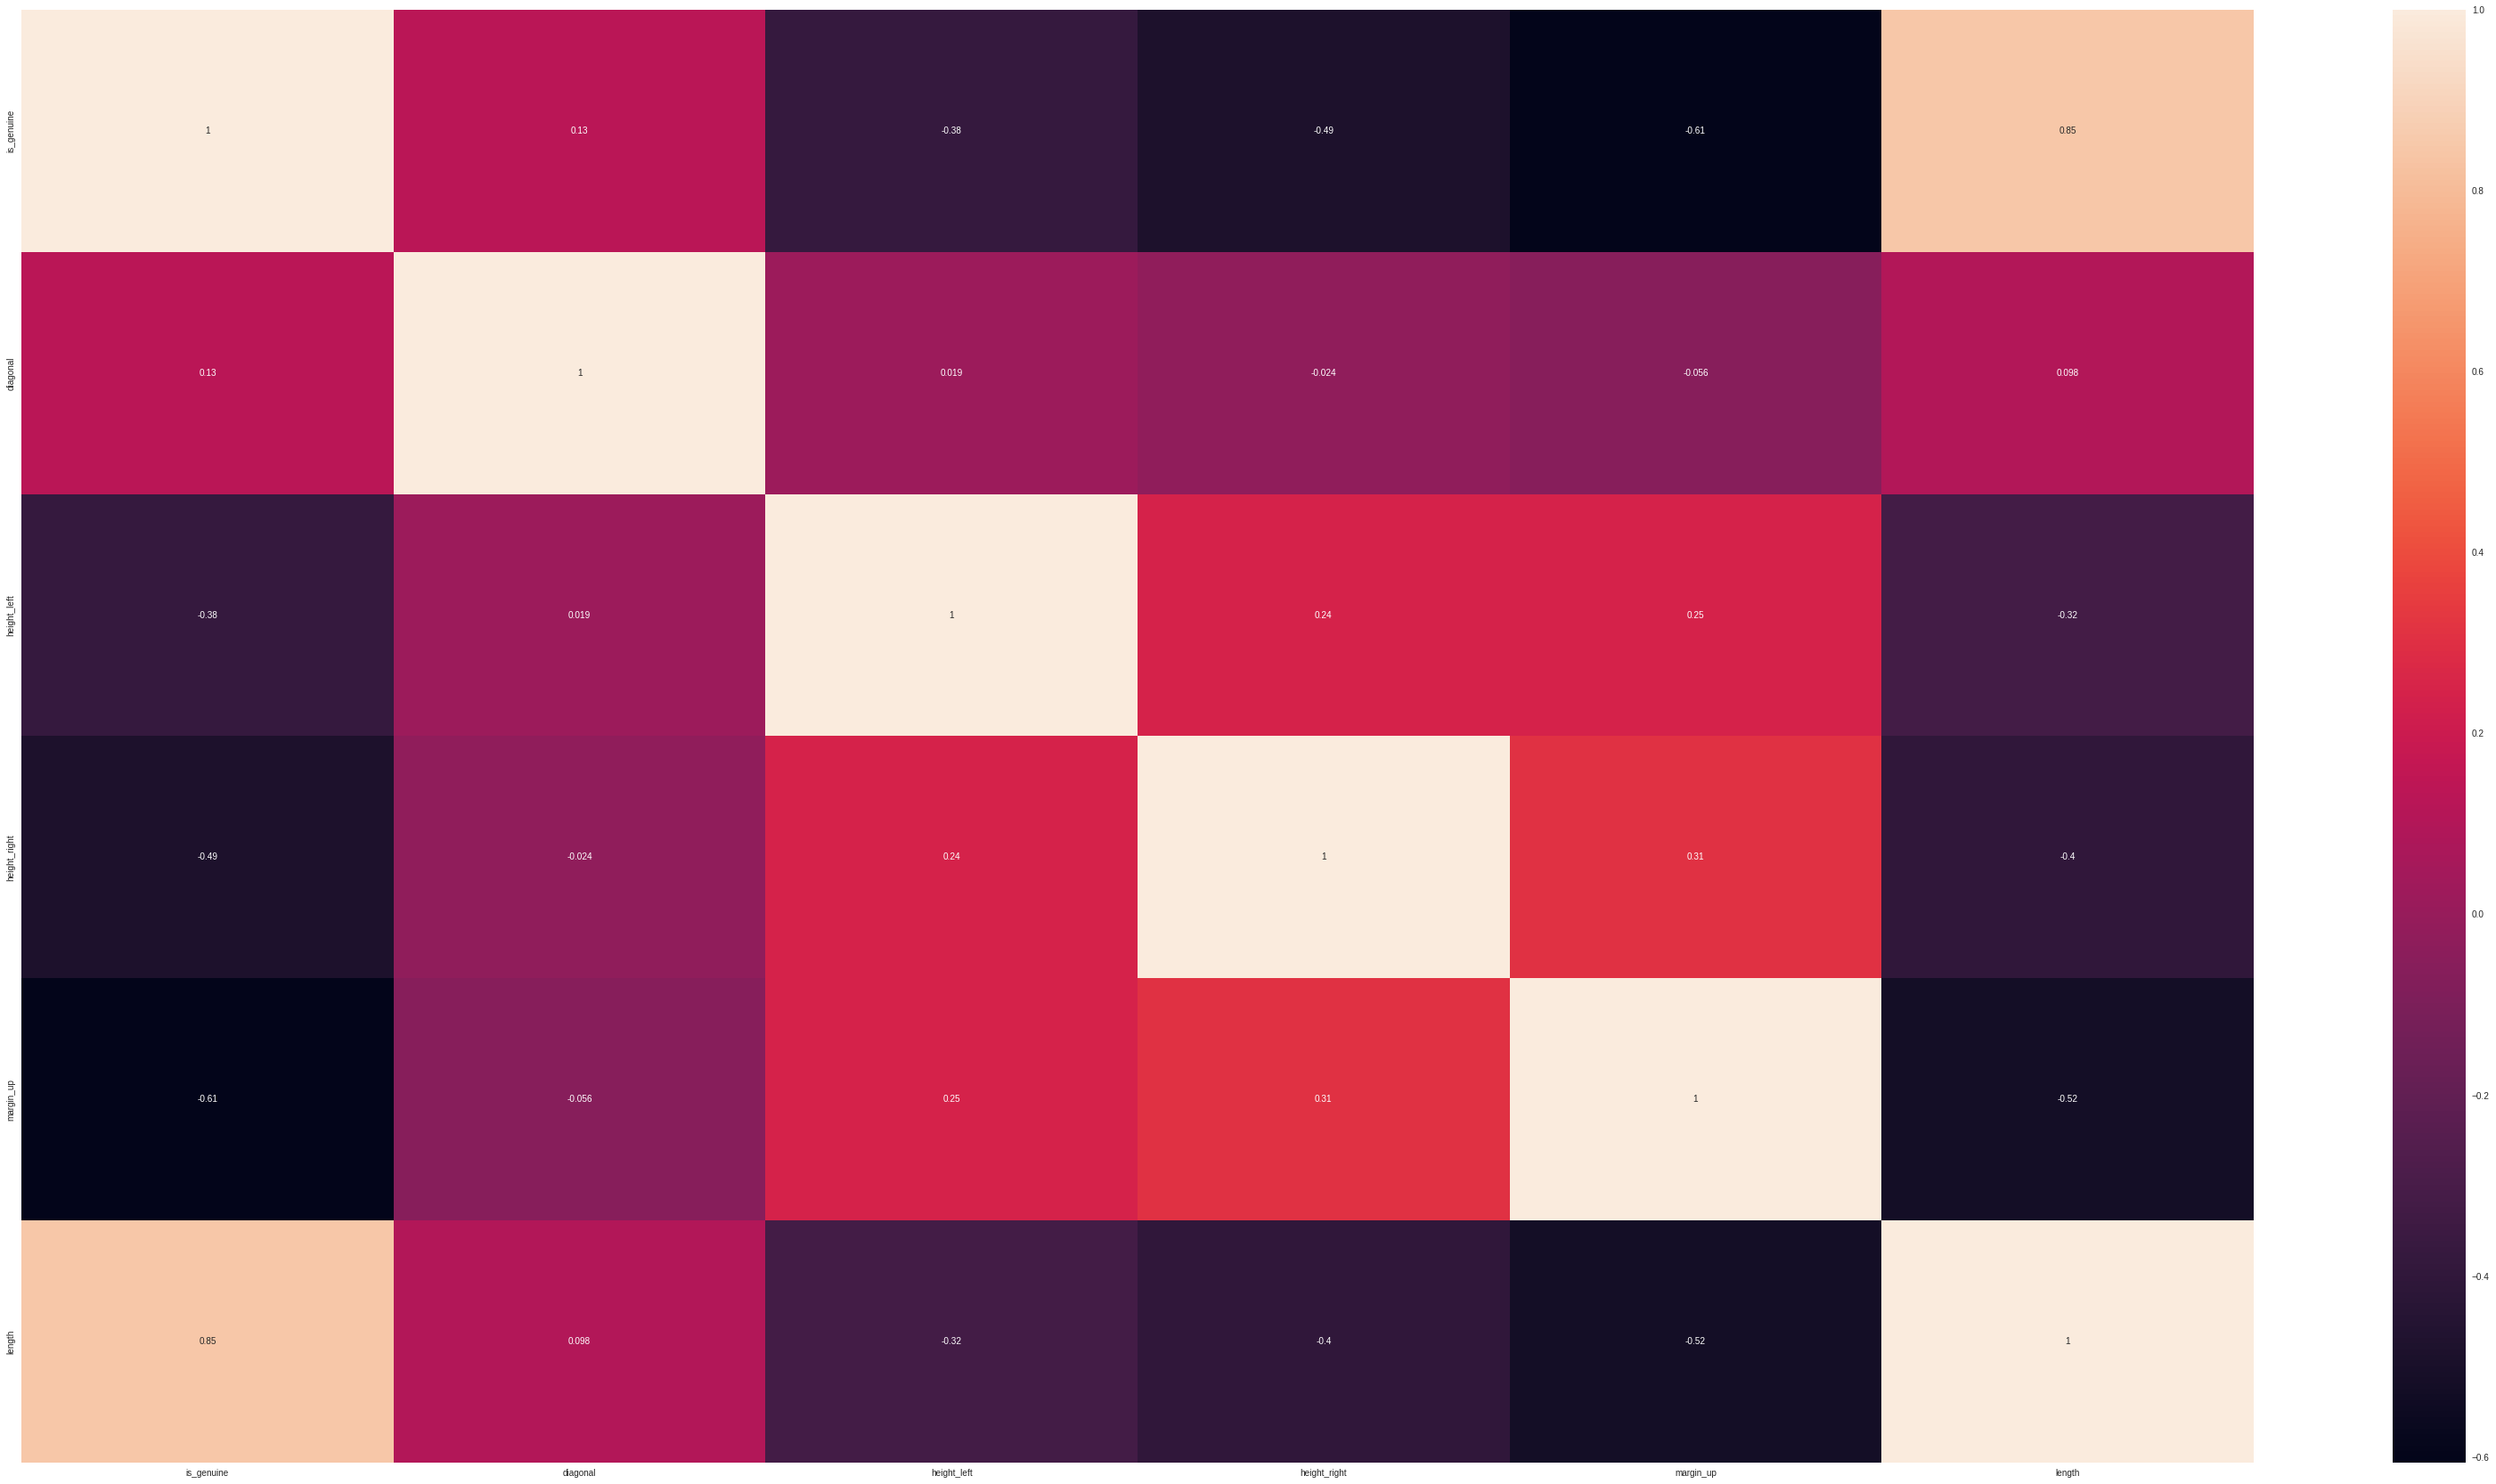

In [34]:
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(),annot=True)

Histogram

<AxesSubplot:xlabel='is_genuine', ylabel='Count'>

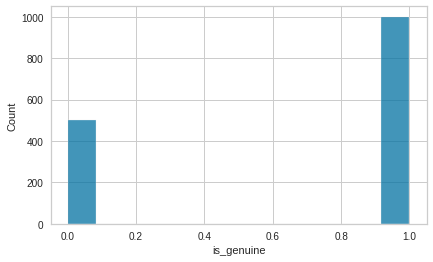

In [35]:
sns.histplot(data=df,x="is_genuine")

Auto Visualizations using AutoViz

In [37]:
from autoviz.AutoViz_Class import AutoViz_Class

In [38]:
AV= AutoViz_Class()

Shape of your Data Set loaded: (1500, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
length,336,float64,0,0.000000,22.400000,0,
margin_low,285,float64,37,2.466667,19.000000,0,fill missing
height_right,170,float64,0,0.000000,11.333333,0,
diagonal,159,float64,0,0.000000,10.600000,0,
height_left,155,float64,0,0.000000,10.333333,0,
margin_up,123,float64,0,0.000000,8.200000,0,
is_genuine,2,bool,0,0.000000,0.133333,0,


    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 21


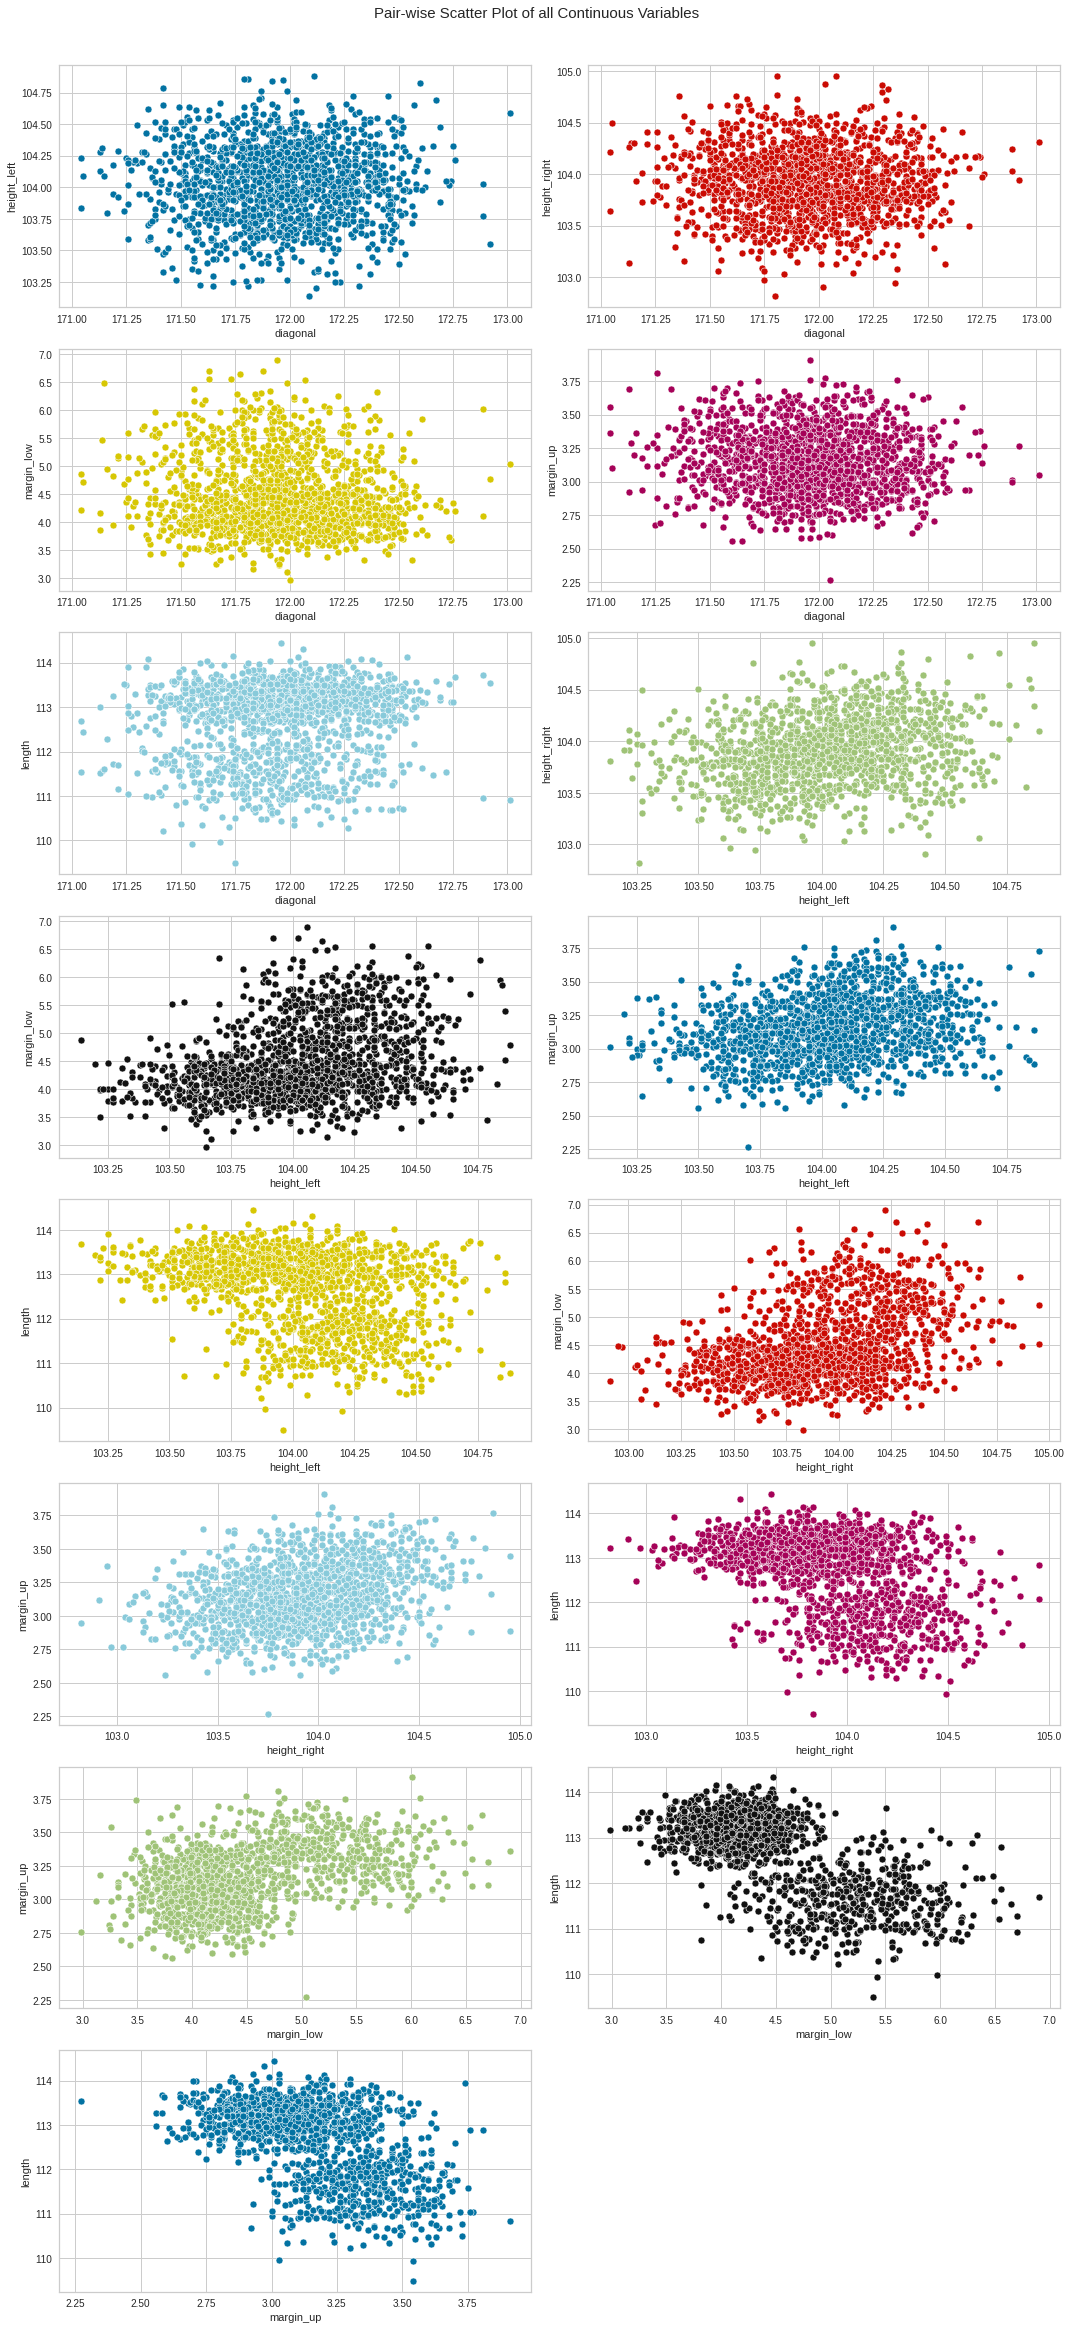

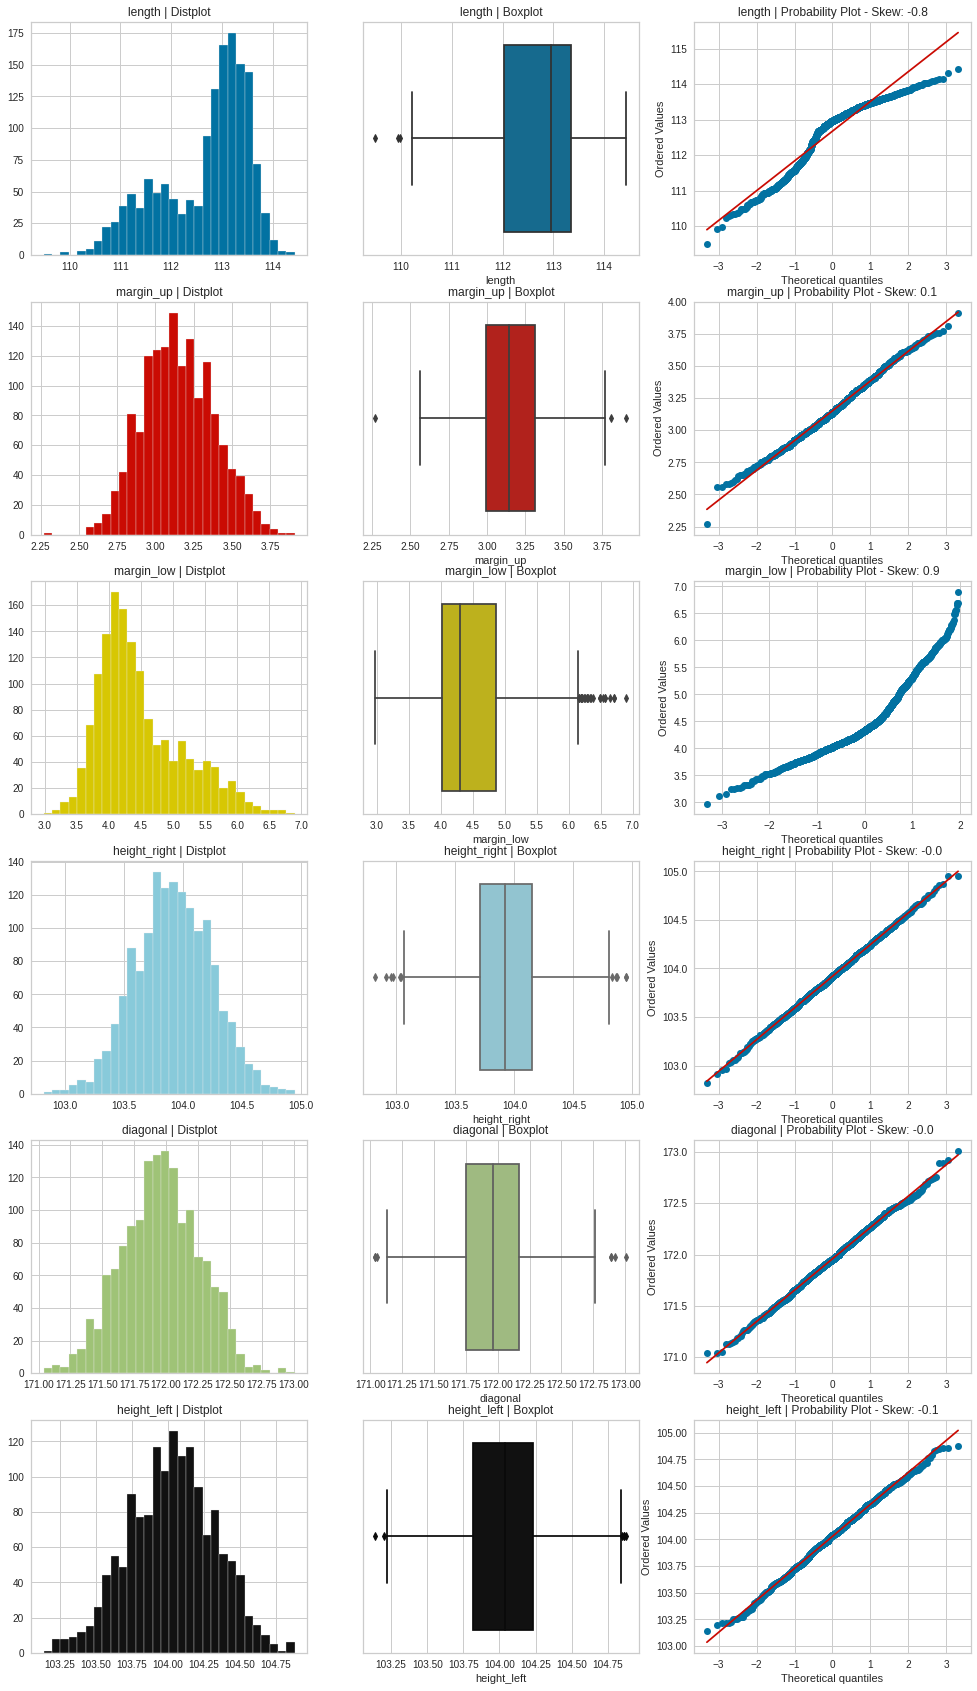

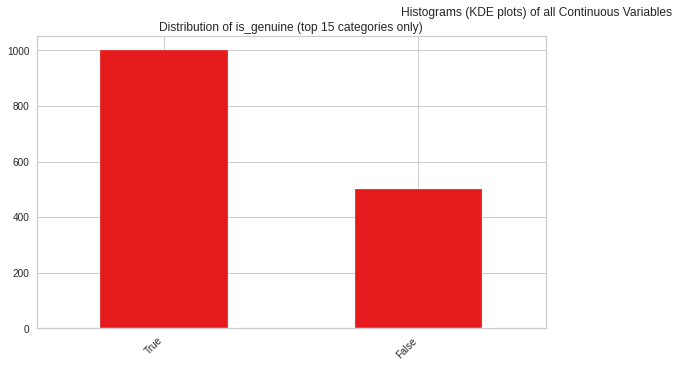

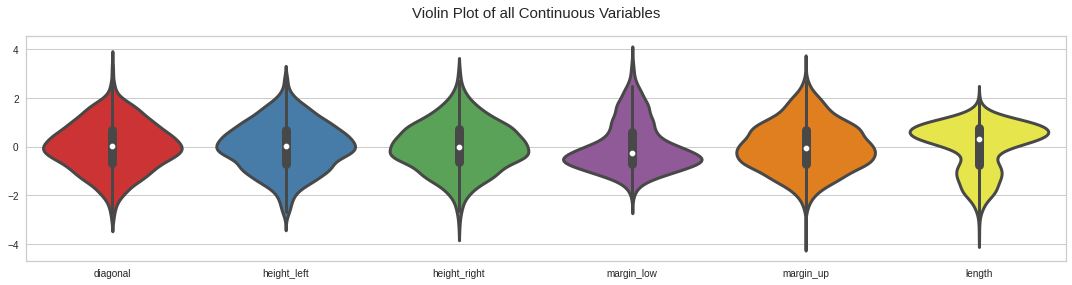

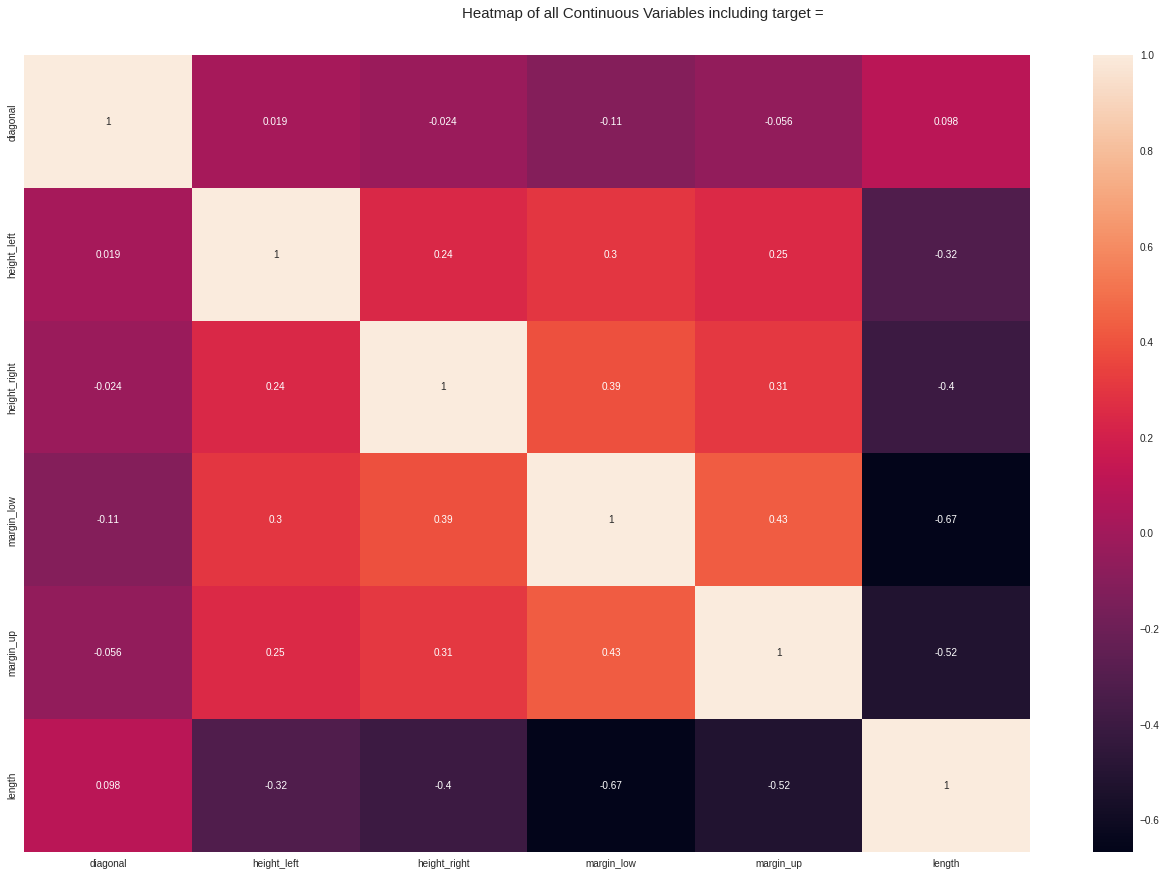

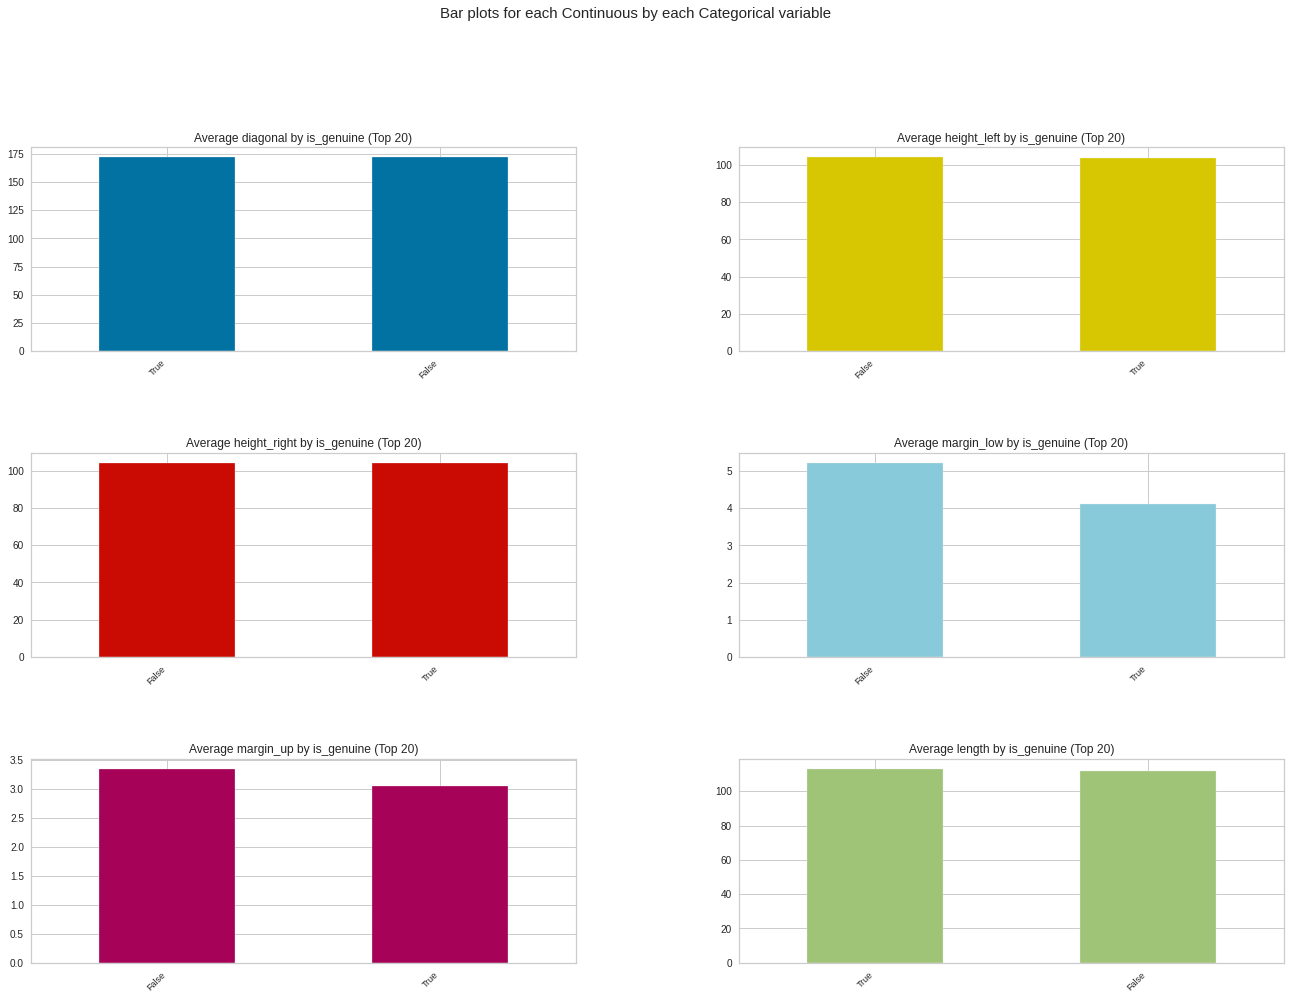

All Plots done
Time to run AutoViz = 9 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [40]:
AV.AutoViz("fake_bills.csv",sep=';')

## Comparing Classification Models

In [41]:
from pycaret.classification import*

In [43]:
s=setup(data=df1,target='is_genuine',session_id=123)

,Description,Value
0,Session id,123
1,Target,is_genuine
2,Target type,Binary
3,Original data shape,"(1500, 6)"
4,Transformed data shape,"(1500, 6)"
5,Transformed train set shape,"(1050, 6)"
6,Transformed test set shape,"(450, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [44]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9752,0.9957,0.9857,0.9777,0.9815,0.9439,0.9446,0.0380
nb,Naive Bayes,0.9743,0.9956,0.9857,0.9763,0.9808,0.9417,0.9424,0.0600
et,Extra Trees Classifier,0.9714,0.9937,0.9871,0.9710,0.9788,0.9350,0.9364,0.4540
lr,Logistic Regression,0.9705,0.9934,0.9871,0.9695,0.9781,0.9328,0.9338,0.6230
ridge,Ridge Classifier,0.9686,0.0000,0.9914,0.9630,0.9769,0.9279,0.9296,0.0330
gbc,Gradient Boosting Classifier,0.9686,0.9924,0.9800,0.9736,0.9765,0.9290,0.9305,0.2450
lda,Linear Discriminant Analysis,0.9686,0.9942,0.9914,0.9630,0.9769,0.9279,0.9296,0.0580
lightgbm,Light Gradient Boosting Machine,0.9676,0.9936,0.9814,0.9708,0.9759,0.9265,0.9275,0.1430
rf,Random Forest Classifier,0.9648,0.9915,0.9829,0.9654,0.9738,0.9199,0.9213,0.3360
ada,Ada Boost Classifier,0.9638,0.9917,0.9771,0.9694,0.9730,0.9181,0.9193,0.1770


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

## QuadraticDiscriminantAnalysis

Quadratic Discriminant Analysis (QDA) is a supervised learning algorithm used for classification problems, similar to Linear Discriminant Analysis (LDA). However, unlike LDA, QDA assumes that the covariance matrix of each class is different. This means that QDA can model more complex decision boundaries than LDA, making it a more powerful algorithm in situations where the classes have different covariance structures.

In [45]:
X=df1.drop('is_genuine',axis=1)
y=df1['is_genuine']

In [46]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
X,y=make_classification(n_samples=1000,n_features=10,n_informative=5,n_classes=2)

Split the dataset into training and test test

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
qda=QuadraticDiscriminantAnalysis()

In [67]:
print(qda)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


In [68]:
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [69]:
y_pred=qda.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1])

In [70]:
# Evaluate the Model

In [71]:
accuracy=qda.score(X_test,y_test)
print(f"Accuracy:{accuracy}")

Accuracy:0.945


In [72]:
preds=qda.predict(X)
preds

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,

### Classification Report

In [ ]:
# A classification report is a report that summarizes the performance of a classification model on a set of test data. It provides various metrics to evaluate the accuracy of the model, such as precision, recall, and F1-score, for each class in the dataset.

# The metrics in a classification report are calculated by comparing the predicted labels of the model with the true labels of the test data. The precision of a class is the fraction of true positives among all the instances that the model classified as that class. The recall of a class is the fraction of true positives among all the instances that belong to that class. The F1-score of a class is the harmonic mean of precision and recall.

# A typical classification report includes the following metrics for each class in the dataset:

# Precision: the fraction of true positives among all the instances classified as the class
# Recall: the fraction of true positives among all the instances that belong to the class
# F1-score: the harmonic mean of precision and recall
# Support: the number of instances in the test data that belong to the class
# In addition, the report also includes the following metrics:

# Accuracy: the fraction of instances that the model classified correctly
# Macro-averaged precision, recall, and F1-score: the average precision, recall, and F1-score over all classes, with each class weighted equally
# Micro-averaged precision, recall, and F1-score: the overall precision, recall, and F1-score, calculated by aggregating the true positives, false positives, and false negatives over all classes.
# Classification reports are useful for evaluating the performance of a classification model and identifying the strengths and weaknesses of the model on different classes. They are often used in machine learning projects to compare the performance of different models or to fine-tune the parameters of a model.

In [73]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       113
           1       0.91      0.97      0.94        87

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



In [74]:
report=classification_report(preds,y)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       489
           1       0.94      0.91      0.93       511

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



## Confusion Matrix

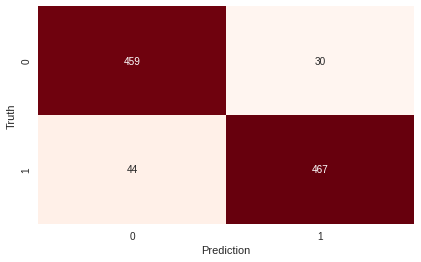

In [77]:
conf_mat=confusion_matrix(preds,y)
sns.heatmap(conf_mat,annot=True,cbar=None,cmap='Reds',fmt='.0f')
plt.ylabel('Truth')
plt.xlabel('Prediction');

## Thank You